Importing some packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline 

# Notes:

* Reading excel file, skipping the first row, setting the header
* Dropping unnecessary columns
* Dropping level
* Transposing  

income_data = pd.read_excel("data/household_income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)  

income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]  

income_data.columns = income_data.columns.droplevel(1)  

income_data.set_index('Unnamed: 0_level_0').T.reset_index()  


Creating some dataframes: covid cases, vaccine shots, weather

In [2]:
covid_cases = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
print(covid_cases.head())
print(covid_cases.tail())

  Specimen Collection Date      Zip  Cases
0                 3/6/2020  37217.0      1
1                3/10/2020  37214.0      1
2                3/11/2020  37013.0      1
3                3/11/2020  37204.0      2
4                3/11/2020  37205.0      1
     Specimen Collection Date      Zip  Cases
8827                3/27/2021  37210.0      1
8828                3/27/2021  37211.0      1
8829                3/27/2021  37212.0      1
8830                3/27/2021  37214.0      2
8831                3/27/2021  37221.0      2


In [3]:
vacc_shots = pd.read_csv('../data/vaccine_with_protocol.csv')
print(vacc_shots.head())
print(vacc_shots.tail())

    vacc_date  zipcode  count_given  dose_nbr  protocol
0  2020-12-12  37215.0          1.0       1.0  two-shot
1  2020-12-14  37205.0          1.0       2.0  two-shot
2  2020-12-14  37215.0          1.0       1.0  two-shot
3  2020-12-15  37221.0          1.0       1.0  two-shot
4  2020-12-16  37215.0          1.0       1.0  two-shot
       vacc_date  zipcode  count_given  dose_nbr  protocol
6689  2021-04-07  37228.0          9.0       1.0  two-shot
6690  2021-04-07  37228.0          2.0       2.0  two-shot
6691  2021-04-07      NaN          8.0       1.0  two-shot
6692  2021-04-07      NaN          1.0       1.0  one-shot
6693  2021-04-07      NaN          7.0       2.0  two-shot


In [4]:
vacc_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [5]:
nash_weather = pd.read_csv('../data/weather_stats.csv')

nash_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37056 entries, 0 to 37055
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          37056 non-null  object 
 1   NAME             37056 non-null  object 
 2   LATITUDE         37056 non-null  float64
 3   LONGITUDE        37056 non-null  float64
 4   ELEVATION        37056 non-null  float64
 5   DATE             37056 non-null  object 
 6   AWND             412 non-null    float64
 7   AWND_ATTRIBUTES  412 non-null    object 
 8   DAPR             561 non-null    float64
 9   DAPR_ATTRIBUTES  561 non-null    object 
 10  EVAP             209 non-null    float64
 11  EVAP_ATTRIBUTES  209 non-null    object 
 12  MDPR             555 non-null    float64
 13  MDPR_ATTRIBUTES  555 non-null    object 
 14  MNPN             215 non-null    float64
 15  MNPN_ATTRIBUTES  215 non-null    object 
 16  MXPN             215 non-null    float64
 17  MXPN_ATTRIBU

C:\Users\tye64\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,11,15,17,19,23,29,31,39,41,43,49,51,53,55,57,59,61,63,65,67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
nash_weather = nash_weather[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'TAVG', 'TMAX', 'TMIN']]
nash_weather.describe()

,LATITUDE,LONGITUDE,TAVG,TMAX,TMIN
count,37056.000000,37056.000000,808.000000,7535.000000,7535.000000
mean,36.111538,-86.770498,59.696782,69.143729,47.397877
std,0.171133,0.257603,15.077935,16.661727,16.345183
min,35.719605,-87.364400,16.000000,13.000000,-99.000000
25%,35.976800,-86.910740,49.000000,58.000000,34.000000
50%,36.110790,-86.772900,60.000000,70.000000,47.000000
75%,36.222431,-86.571596,73.000000,83.000000,62.000000
max,36.538515,-86.306030,87.000000,99.000000,77.000000


In [7]:
nash_weather = nash_weather.rename({'TAVG': 'temp_avg', 'TMAX':'temp_max', 'TMIN':'temp_min'}, axis =1)
nash_weather.head()
nash_weather['DATE'] = pd.to_datetime(nash_weather['DATE'])

Renaming some columns in covid cases

In [8]:
covid_cases = covid_cases.rename(columns = {'Specimen Collection Date' : 'date', 'Zip':'zip','Cases':'cases'})
covid_cases.head()

,date,zip,cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


Renaming columns in vacc shots

In [9]:
vacc_shots = vacc_shots.rename(columns = {'vacc_date': 'date', 'zipcode': 'zip', 'count_given':'vacc_given', 'dose_nbr':'dose_nbr', 'protocal':'protocal'})
vacc_shots.head()

,date,zip,vacc_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [10]:
covid_cases['zip'] = covid_cases['zip'].astype('Int64')
covid_cases['zip'] = covid_cases['zip'].astype('str')
covid_cases['date'] = pd.to_datetime(covid_cases['date'])

In [11]:
vacc_shots['zip'] = vacc_shots['zip'].astype('Int64')
vacc_shots['zip'] = vacc_shots['zip'].astype('str')
vacc_shots['date'] = pd.to_datetime(vacc_shots['date'])

In [12]:
print(covid_cases.dtypes)
covid_cases.info

date     datetime64[ns]
zip              object
cases             int64
dtype: object


<bound method DataFrame.info of            date    zip  cases
0    2020-03-06  37217      1
1    2020-03-10  37214      1
2    2020-03-11  37013      1
3    2020-03-11  37204      2
4    2020-03-11  37205      1
...         ...    ...    ...
8827 2021-03-27  37210      1
8828 2021-03-27  37211      1
8829 2021-03-27  37212      1
8830 2021-03-27  37214      2
8831 2021-03-27  37221      2

[8832 rows x 3 columns]>

In [13]:
#group by zipcode to get total cases per zipcode
covid_group_zip = covid_cases.groupby(['zip'],as_index=False)['cases'].sum()
covid_group_zip

,zip,cases
0,37013,13354
1,37027,231
2,37069,16
3,37072,2984
4,37076,4279
5,37080,574
6,37115,4574
7,37138,2359
8,37189,479
9,37201,299


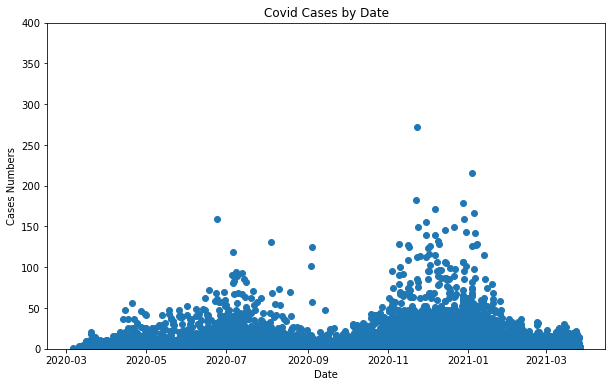

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(x = covid_cases['date'], y = covid_cases['cases'])
plt.xlabel('Date')
plt.ylabel('Cases Numbers')
plt.ylim(0, 400)
plt.title('Covid Cases by Date');

In [15]:
print(nash_weather.head())
nash_weather.info()

       STATION                             NAME   LATITUDE  LONGITUDE  \
0  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
1  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
2  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
3  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   
4  US1TNCH0002  KINGSTON SPRINGS 0.3 ENE, TN US  36.098414 -87.096259   

        DATE  temp_avg  temp_max  temp_min  
0 2020-03-01       NaN       NaN       NaN  
1 2020-03-02       NaN       NaN       NaN  
2 2020-03-03       NaN       NaN       NaN  
3 2020-03-04       NaN       NaN       NaN  
4 2020-03-05       NaN       NaN       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37056 entries, 0 to 37055
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    37056 non-null  object        
 1   NAME       37056 non-null  object    

In [16]:
nash_date_group = nash_weather.groupby('DATE')
temp_max_mean = nash_weather.groupby('DATE', as_index = False)['temp_max'].mean()
nash_weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,temp_avg,temp_max,temp_min
0,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-01,NaN,NaN,NaN
1,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-02,NaN,NaN,NaN
2,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-03,NaN,NaN,NaN
3,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-04,NaN,NaN,NaN
4,US1TNCH0002,"KINGSTON SPRINGS 0.3 ENE, TN US",36.098414,-87.096259,2020-03-05,NaN,NaN,NaN


In [17]:
temp_mean = nash_weather.groupby('DATE', as_index = False)['temp_avg'].mean()
temp_mean['DATE'].dtype

dtype('<M8[ns]')

<AxesSubplot:xlabel='DATE'>

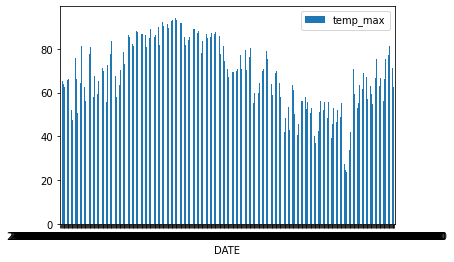

In [18]:
temp_max_mean.plot.bar(x='DATE', y='temp_max', rot=0)

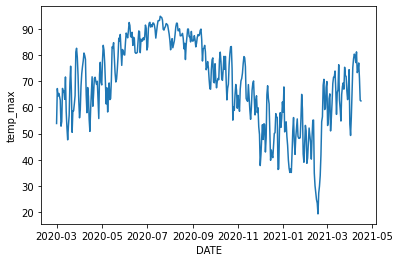

In [19]:
ax = sns.lineplot(x='DATE', y='temp_max', data=temp_max_mean)

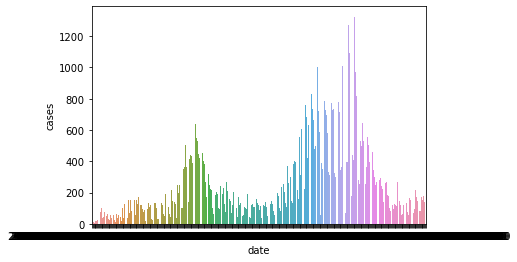

In [20]:
covid_cases['date'] = pd.to_datetime(covid_cases['date'])
covid_group_date = covid_cases.groupby(['date'],as_index=False)['cases'].sum()
ax = sns.barplot(x='date', y='cases', data=covid_group_date)

In [21]:
covid_group_date['date'] = pd.to_datetime(covid_group_date['date'])

# Max temp is the line plot on top of covid cases as bar plot

<AxesSubplot:label='f17d1109-03e6-42a0-ac8c-719bb5493c2c', xlabel='date', ylabel='cases'>

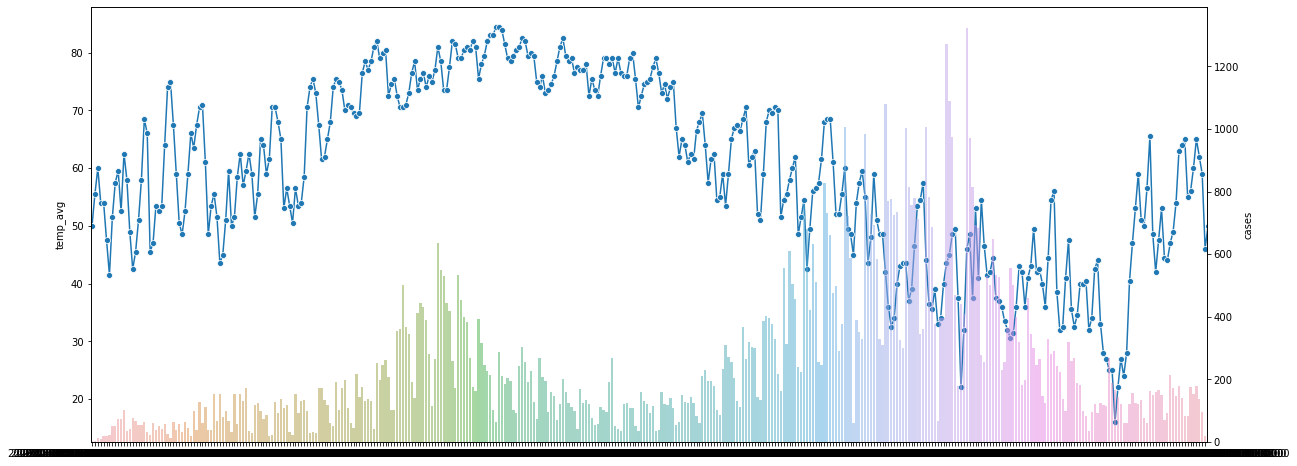

In [22]:
fig, ax1 = plt.subplots(figsize=(20,8))

sns.lineplot(data = temp_mean['temp_avg'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = covid_group_date, x='date', y='cases', alpha=0.5, ax=ax2)

## Reading Metadata function. From Joshua Rio-Ross
Basically, each table’s metadata.json is a dictionary with subdictionaries (as I’m sure you already saw), so I wrote a function that drills down to the right depth and gets each column name and stores it in a list in order, then finally it uses that list to rename the columns in the geodataframe/dataframe.  

One important thing: The tablename is the Census Reporter name that you see in the top left part of the page and that’s at the beginning of all the column names. So it’s a string that’s something like “B09001” or whatever.  



def metarename(file, metadata, tablename):
    """Given a Census Reporter file and its metadata, rename all imported DataFrame columns."""
    name_list = ["geoid", "zip"]
    for i in metadata["tables"][tablename]["columns"].items():
        col_name = i[1]["name"]
        col_name_error = i[1]["name"]+" error"
        name_list.append(col_name)
        name_list.append(col_name_error)
    name_list.append("geometry")
    file.columns = name_list
    return file

# Read in GeoDataFrame from geojson
eth_geo_df = gpd.read_file('../data/ethnicity_geojson/ehtnicity_geo.geojson')
# Read in metadata DataFrame from json using json package
er_md = open('../data/ethnicity_geojson/metadata.json')
eth_race_meta = json.load(er_md)
# Run function using table name "B03002"
fdf = metarename(eth_geo_df, eth_race_meta, "B03002")

fdf['zip'].value_counts